In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
color_pal = sns.color_palette()
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.
4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.

In [820]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Jacob\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [821]:
dataset_path = "C:/Users/Jacob/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1"

files = os.listdir(dataset_path)
print(files)


['day.csv', 'hour.csv', 'Readme.txt']


In [822]:
file_path = "C:/Users/Jacob/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/hour.csv"

df = pd.read_csv(file_path)

2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.

In [823]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [824]:
# df = df.set_index('dteday')
# df.index = pd.to_datetime(df.index)
# df = df.sort_index()

In [825]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Checking the format of col "hr". There is 24 unique elements, and the max value is 23 (as expected)

In [826]:
df["hr"].nunique()

24

In [827]:
df["hr"].describe()

count    17379.000000
mean        11.546752
std          6.914405
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hr, dtype: float64

Combining dteday and hr columns, and set them as index 

In [828]:
df["DayHour"] = pd.to_datetime(df["dteday"].astype(str) + " " + df["hr"].astype(str) + ":00:00")

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  object        
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [830]:
df = df.set_index('DayHour')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [831]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
DayHour,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


Checking for missing timestamps. There is missing 165 timestamps:

In [832]:
range_of_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')
missing_timestamps = range_of_dates.difference(df.index)
missing_timestamps


DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00',
               ...
               '2012-10-30 07:00:00', '2012-10-30 08:00:00',
               '2012-10-30 09:00:00', '2012-10-30 10:00:00',
               '2012-10-30 11:00:00', '2012-10-30 12:00:00',
               '2012-11-08 03:00:00', '2012-11-29 03:00:00',
               '2012-12-24 04:00:00', '2012-12-25 03:00:00'],
              dtype='datetime64[ns]', length=165, freq=None)

In [833]:
df.loc['2011-01-02 04:00:00':'2011-01-02 07:00:00']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
DayHour,,,,,,,,,,,,,,,,,
2011-01-02 04:00:00,29,2011-01-02,1,0,1,4,0,0,0,2,0.46,0.4545,0.94,0.1940,2,1,3
2011-01-02 06:00:00,30,2011-01-02,1,0,1,6,0,0,0,3,0.42,0.4242,0.77,0.2985,0,2,2
2011-01-02 07:00:00,31,2011-01-02,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1


Adding missing dates:

In [834]:
df=df.reindex(range_of_dates)

In [835]:
df.loc['2011-01-02 04:00:00':'2011-01-02 07:00:00']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-02 04:00:00,29.0,2011-01-02,1.0,0.0,1.0,4.0,0.0,0.0,0.0,2.0,0.46,0.4545,0.94,0.1940,2.0,1.0,3.0
2011-01-02 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02 06:00:00,30.0,2011-01-02,1.0,0.0,1.0,6.0,0.0,0.0,0.0,3.0,0.42,0.4242,0.77,0.2985,0.0,2.0,2.0
2011-01-02 07:00:00,31.0,2011-01-02,1.0,0.0,1.0,7.0,0.0,0.0,0.0,2.0,0.40,0.4091,0.76,0.1940,0.0,1.0,1.0


As we only had 165 missing timestamps, we fill in Nan values with forward fill method:

In [836]:
df = df.fillna(method="ffill")

C:\Users\Jacob\AppData\Local\Temp\ipykernel_23360\567689999.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [837]:
df.loc['2011-01-02 04:00:00':'2011-01-02 07:00:00']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-02 04:00:00,29.0,2011-01-02,1.0,0.0,1.0,4.0,0.0,0.0,0.0,2.0,0.46,0.4545,0.94,0.1940,2.0,1.0,3.0
2011-01-02 05:00:00,29.0,2011-01-02,1.0,0.0,1.0,4.0,0.0,0.0,0.0,2.0,0.46,0.4545,0.94,0.1940,2.0,1.0,3.0
2011-01-02 06:00:00,30.0,2011-01-02,1.0,0.0,1.0,6.0,0.0,0.0,0.0,3.0,0.42,0.4242,0.77,0.2985,0.0,2.0,2.0
2011-01-02 07:00:00,31.0,2011-01-02,1.0,0.0,1.0,7.0,0.0,0.0,0.0,2.0,0.40,0.4091,0.76,0.1940,0.0,1.0,1.0


Visualizing dataset:

<Figure size 640x480 with 0 Axes>

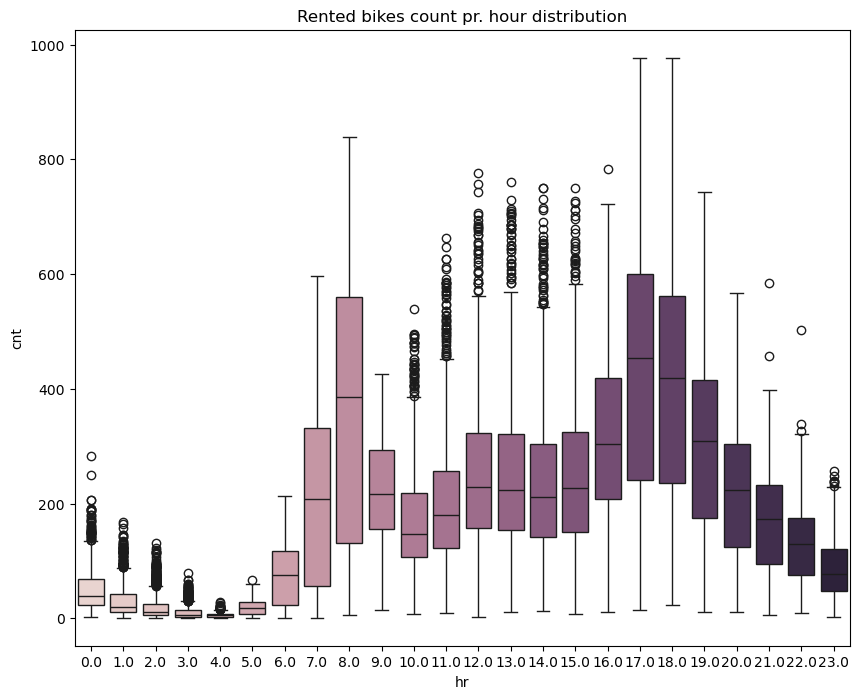

In [838]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="hr", y="cnt", hue="hr", legend=False, ax=ax)   
ax.set_title("Rented bikes count pr. hour distribution")
plt.show()

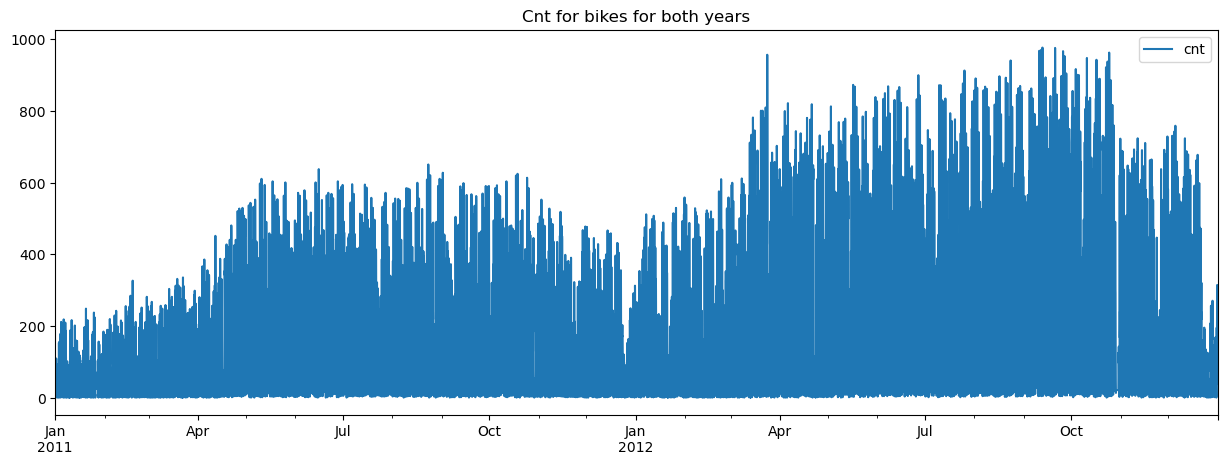

In [839]:
df.plot(y ='cnt',
        figsize=(15, 5),
        color=color_pal[0],
        title="Cnt for bikes for both years")
plt.show()

Looking for seasonality and trend

<Figure size 640x480 with 0 Axes>

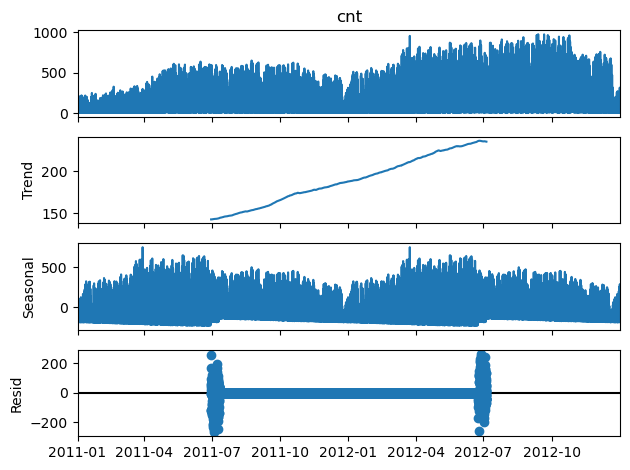

In [840]:
plt.clf()

result = seasonal_decompose(df['cnt'], model='additive', period=(24*360))  ## 24 hours * 365 days

result.plot()
plt.show()


As seen above no meaningful season pattern can be seen. Hoewever it is clear that the trend of bike rentals are rising. 
We now try to reduce the period to 180 days, trying to find a seasionality:

In [841]:
shorter_df = df.tail(180*24) # 180 days*24 hours

shorter_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2012-07-05 00:00:00,13100.0,2012-07-05,3.0,1.0,7.0,0.0,0.0,4.0,1.0,1.0,0.74,0.6667,0.51,0.1045,17.0,71.0,88.0
2012-07-05 01:00:00,13101.0,2012-07-05,3.0,1.0,7.0,1.0,0.0,4.0,1.0,1.0,0.74,0.6667,0.51,0.2836,6.0,24.0,30.0
2012-07-05 02:00:00,13102.0,2012-07-05,3.0,1.0,7.0,2.0,0.0,4.0,1.0,1.0,0.74,0.6667,0.51,0.0000,4.0,14.0,18.0
2012-07-05 03:00:00,13103.0,2012-07-05,3.0,1.0,7.0,3.0,0.0,4.0,1.0,1.0,0.72,0.6667,0.54,0.1940,2.0,5.0,7.0
2012-07-05 04:00:00,13104.0,2012-07-05,3.0,1.0,7.0,4.0,0.0,4.0,1.0,1.0,0.72,0.6667,0.58,0.0000,0.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375.0,2012-12-31,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
2012-12-31 20:00:00,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
2012-12-31 21:00:00,17377.0,2012-12-31,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
2012-12-31 22:00:00,17378.0,2012-12-31,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


<Figure size 640x480 with 0 Axes>

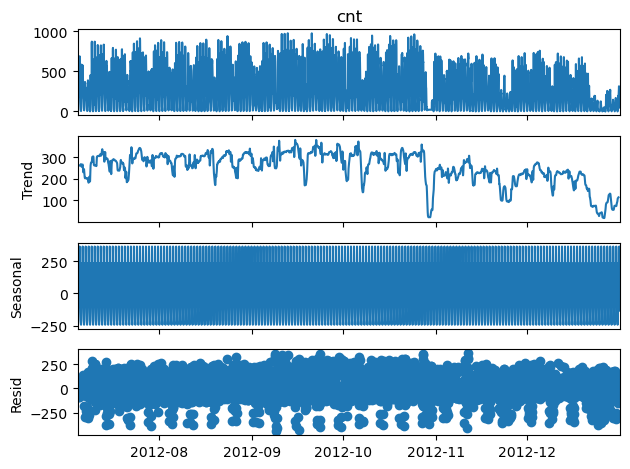

In [842]:
plt.clf()

result = seasonal_decompose(shorter_df["cnt"], model="additive", period=24)

result.plot()
plt.show()


We also try with period of 30 days:

In [843]:
shorter_df = df.tail(30*24)

<Figure size 640x480 with 0 Axes>

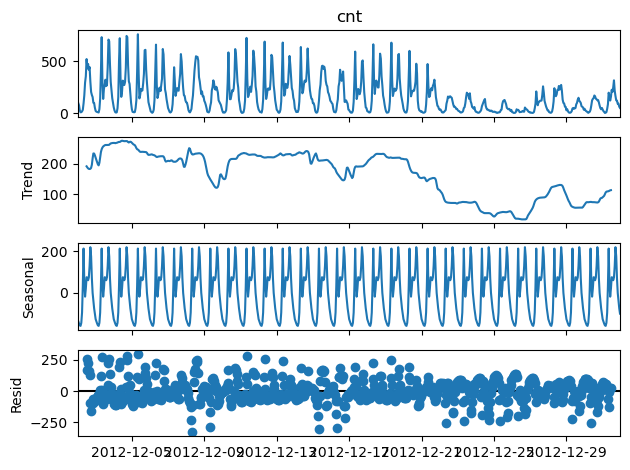

In [844]:

plt.clf()

result = seasonal_decompose(shorter_df["cnt"], model="additive", period=24)  


result.plot()
plt.show()


And for 7 days:

In [845]:
shorter_df = df.tail(7*24) 

<Figure size 640x480 with 0 Axes>

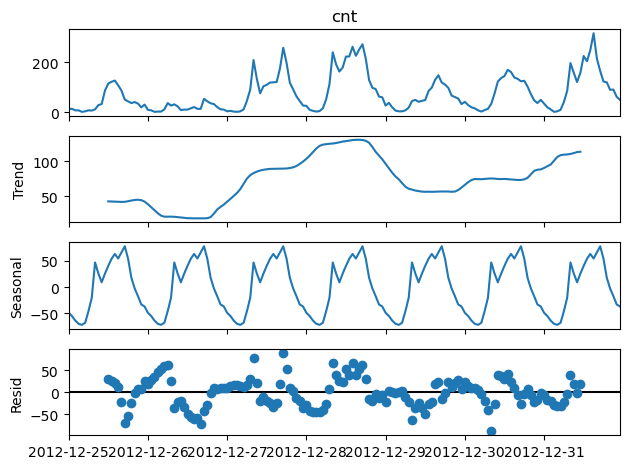

In [846]:
plt.clf()

result = seasonal_decompose(shorter_df["cnt"], model="additive", period=24)  


result.plot()
plt.show()


And for 3 days:

In [847]:
shorter_df = df.tail(3*24) 

<Figure size 640x480 with 0 Axes>

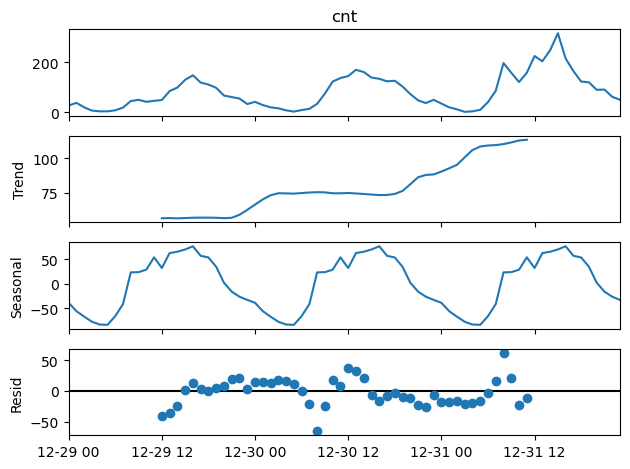

In [848]:
plt.clf()

result = seasonal_decompose(shorter_df["cnt"], model="additive", period=24)  


result.plot()
plt.show()


The above gives us a good indication, that there is a daily seasionality. It seems that the amount of bike rentails is higher throughout the day than night. The overall trend is also growing, but at a slower pace. 

4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.

In [849]:
def create_features(df):

    df = df.copy()
    # Lag features
    df['lag_1d'] = df['cnt'].shift(1*24)   # 1 day lag
    df['lag_1w'] = df['cnt'].shift(7*24)   # 1 week lag
    df['lag_1m'] = df['cnt'].shift(30*24)  # 1 month lag

    # Rolling statistics features
    df['rolling_mean_1d'] = df['cnt'].rolling(window=1*24).mean()  # Last 1 day rolling mean
    df['rolling_mean_7d'] = df['cnt'].rolling(window=7*24).mean()  # Last 7 days rolling mean
    df['rolling_mean_30d'] = df['cnt'].rolling(window=30*24).mean()  # Last 30 days rolling mean
    df['rolling_mean_90d'] = df['cnt'].rolling(window=90*24).mean()  # Last 90 days rolling mean
    df['rolling_mean_same_month_last_year'] = df['cnt'].shift(365*24).rolling(window=30*24).mean()  # Same month previous year rolling mean
    df['rolling_mean_same_week_last_year'] = df['cnt'].shift(365*24).rolling(window=7*24).mean()  # Same week previous year rolling mean
    df['rolling_mean_same_day_last_year'] = df['cnt'].shift(365*24).rolling(window=1*24).mean()  # Same day previous year rolling mean

    return df

df = create_features(df)

In [850]:
# # Lag features
# df['lag_1d'] = df['cnt'].shift(1*24)   # 1 day lag
# df['lag_1w'] = df['cnt'].shift(7*24)   # 1 week lag
# df['lag_1m'] = df['cnt'].shift(30*24)  # 1 month lag

# # Rolling statistics features
# df['rolling_mean_7d'] = df['cnt'].rolling(window=7*24).mean()  # Last 7 days rolling mean
# df['rolling_mean_30d'] = df['cnt'].rolling(window=30*24).mean()  # Last 30 days rolling mean
# df['rolling_mean_90d'] = df['cnt'].rolling(window=90*24).mean()  # Last 90 days rolling mean
# df['rolling_mean_same_month_last_year'] = df['cnt'].shift(365*24).rolling(window=30*24).mean()  # Same month previous year rolling mean
# df['rolling_mean_same_week_last_year'] = df['cnt'].shift(365*24).rolling(window=7*24).mean()  # Same week previous year rolling mean
# df['rolling_mean_same_day_last_year'] = df['cnt'].shift(365*24).rolling(window=1*24).mean()  # Same day previous year rolling mean


In [851]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,lag_1d,lag_1w,lag_1m,rolling_mean_1d,rolling_mean_7d,rolling_mean_30d,rolling_mean_90d,rolling_mean_same_month_last_year,rolling_mean_same_week_last_year,rolling_mean_same_day_last_year
2012-12-31 19:00:00,17375.0,2012-12-31,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,...,102.0,18.0,249.0,110.166667,73.303571,165.100000,215.398148,114.186111,88.226190,93.208333
2012-12-31 20:00:00,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,...,72.0,23.0,198.0,110.875000,73.696429,164.948611,215.297685,114.037500,88.565476,93.708333
2012-12-31 21:00:00,17377.0,2012-12-31,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,...,47.0,22.0,158.0,112.666667,74.101190,164.854167,215.205556,113.981944,88.875000,94.500000
2012-12-31 22:00:00,17378.0,2012-12-31,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,...,36.0,12.0,147.0,113.708333,74.392857,164.734722,215.122685,113.931944,89.166667,95.666667
2012-12-31 23:00:00,17379.0,2012-12-31,1.0,1.0,12.0,23.0,0.0,1.0,1.0,1.0,...,49.0,11.0,126.0,113.708333,74.619048,164.627778,215.100000,113.840278,89.244048,95.583333


Verifying that lag and rolling features worked as intended

In [852]:
df.loc['2012-12-01-19:00:00':'2012-12-24']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,lag_1d,lag_1w,lag_1m,rolling_mean_1d,rolling_mean_7d,rolling_mean_30d,rolling_mean_90d,rolling_mean_same_month_last_year,rolling_mean_same_week_last_year,rolling_mean_same_day_last_year
2012-12-01 19:00:00,16657.0,2012-12-01,4.0,1.0,12.0,19.0,0.0,6.0,0.0,2.0,...,377.0,83.0,452.0,219.291667,193.785714,211.302778,261.138426,141.122222,142.773810,165.458333
2012-12-01 20:00:00,16658.0,2012-12-01,4.0,1.0,12.0,20.0,0.0,6.0,0.0,1.0,...,245.0,58.0,296.0,217.333333,194.619048,211.166667,261.181944,141.133333,143.339286,165.458333
2012-12-01 21:00:00,16659.0,2012-12-01,4.0,1.0,12.0,21.0,0.0,6.0,0.0,2.0,...,183.0,75.0,267.0,216.291667,195.113095,211.015278,261.175926,141.054167,143.494048,163.333333
2012-12-01 22:00:00,16660.0,2012-12-01,4.0,1.0,12.0,22.0,0.0,6.0,0.0,2.0,...,163.0,76.0,202.0,215.625000,195.535714,210.938889,261.167130,141.048611,143.755952,163.250000
2012-12-01 23:00:00,16661.0,2012-12-01,4.0,1.0,12.0,23.0,0.0,6.0,0.0,2.0,...,110.0,57.0,120.0,216.291667,195.946429,210.947222,261.168519,141.101389,144.125000,164.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24 19:00:00,17208.0,2012-12-24,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,...,58.0,340.0,83.0,43.000000,139.208333,193.212500,232.602778,126.913889,101.547619,31.666667
2012-12-24 20:00:00,17209.0,2012-12-24,1.0,1.0,12.0,20.0,0.0,1.0,1.0,3.0,...,52.0,200.0,58.0,41.791667,138.154762,193.163889,232.416667,126.818056,101.083333,31.750000
2012-12-24 21:00:00,17210.0,2012-12-24,1.0,1.0,12.0,21.0,0.0,1.0,1.0,3.0,...,42.0,120.0,75.0,40.958333,137.571429,193.090278,232.289352,126.726389,100.666667,31.750000
2012-12-24 22:00:00,17211.0,2012-12-24,1.0,1.0,12.0,22.0,0.0,1.0,1.0,2.0,...,58.0,54.0,76.0,39.041667,137.321429,193.001389,232.207870,126.669444,100.476190,31.625000


5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

We start by dividing data into train/test split of 80/20, and visualizing it

<Figure size 640x480 with 0 Axes>

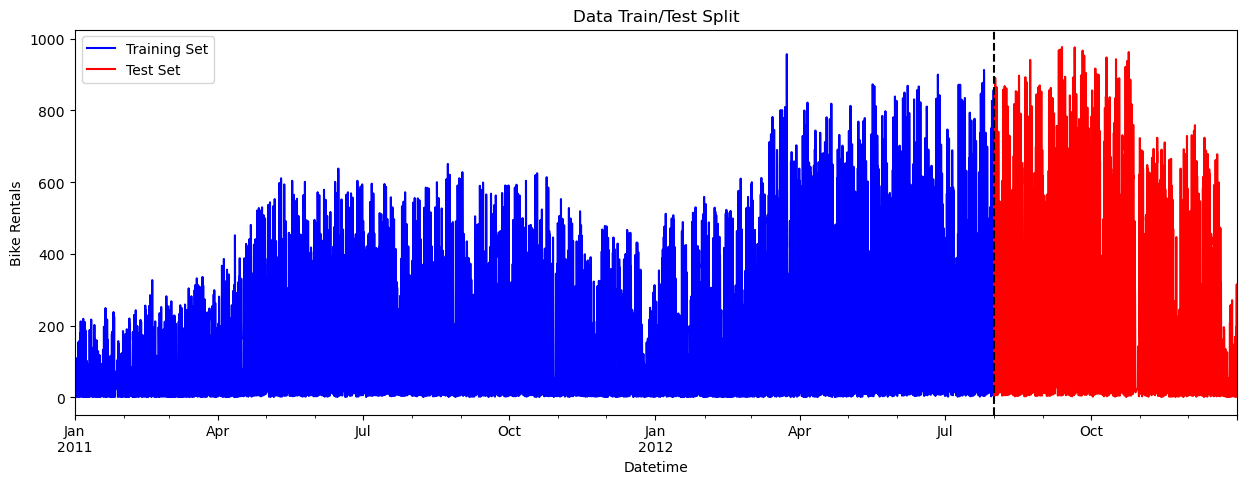

In [853]:
train = df.loc[df.index < "2012-08-01"]
test = df.loc[df.index >= "2012-08-01"]

plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
train["cnt"].plot(ax=ax, label="Training Set", title="Data Train/Test Split", color="blue")
test["cnt"].plot(ax=ax, label="Test Set", color="red")
ax.axvline("2012-08-01", color="black", ls="--")
ax.legend(["Training Set", "Test Set"])
plt.xlabel("Datetime")
plt.ylabel("Bike Rentals")
plt.show()

Then we select the features and the target variable (cnt)

In [854]:
train = create_features(train)
test = create_features(test)

features = ["hr", "weekday", "mnth", "yr"]
target = "cnt"

X_train_lr = train[features]
y_train_lr = train[target]

X_test_lr = test[features]
y_test_lr = test[target]


Fitting the model:

In [855]:
lr = LinearRegression()

lr.fit(X_train_lr, y_train_lr)

y_pred_lr = lr.predict(X_test_lr)


We evalutate the model:

In [856]:

rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr}")
print(f"Linear Regression - MAE: {mae_lr}")

Linear Regression - RMSE: 209.197935096461
Linear Regression - MAE: 172.66230859410584


The error rate is quite high, as indicated by both RMSE and MAE. As shown in the figure below, the models is not good at predicting, and thus we can conclude that a linear model is not good at predicting our data

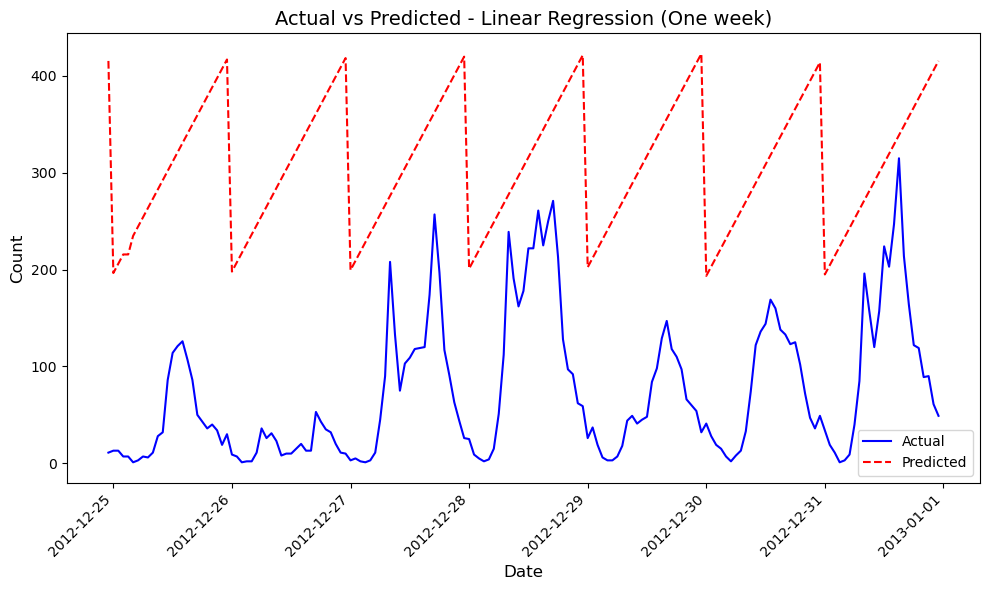

In [857]:
end_date = y_test_lr.index[-1]  # End of the test set
start_date = end_date - pd.Timedelta(days=7)  

# Filter for the last week
y_test_week = y_test_lr.loc[start_date:end_date]

# Ensure y_pred_lr is a pandas series with the same index as y_test
y_pred_lr_series = pd.Series(y_pred_lr, index=y_test_lr.index)

# Now filter the predictions for the same week
y_pred_lr_week = y_pred_lr_series.loc[start_date:end_date]

# Plot actual vs predicted for one week
plt.figure(figsize=(10, 6))
plt.plot(y_test_week.index, y_test_week, label='Actual', color='blue')
plt.plot(y_test_week.index, y_pred_lr_week, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted - Linear Regression (One week)', fontsize=14)  # Adjust title font size
plt.xlabel('Date', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('Count', fontsize=12)  # Adjust y-axis label font size
plt.legend()

# Reduce size of x-axis labels and rotate for readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust x-axis label font size here

plt.tight_layout()  # Ensure labels don't get cut off
plt.show()


6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

In [858]:
features_xgb = ["hr", "weekday", "mnth", "yr",'season',
    'lag_1d', 'lag_1w', 'lag_1m',
    "rolling_mean_1d", 'rolling_mean_7d', 'rolling_mean_30d', 'rolling_mean_same_month_last_year', 'rolling_mean_same_week_last_year', "rolling_mean_same_day_last_year"]

# XGBoost Data
X_train_xgb = train[features_xgb]
y_train_xgb = train[target]

X_test_xgb = test[features_xgb]
y_test_xgb = test[target]

In [859]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'eval_metric': 'rmse',  # Evaluation metric
    'max_depth': 3,  # Depth of the trees
    'learning_rate': 0.01,  # Learning rate
    'colsample_bytree': 0.8,  # Subsample of features
    'subsample': 0.8  # Subsample ratio
}

# Watchlist for monitoring performance on train and test sets
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Number of boosting rounds and early stopping
num_round = 1000  # Number of boosting rounds
early_stopping_rounds = 50  # Early stopping

# Train the model
reg = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=early_stopping_rounds,verbose_eval=100)

# # Predict on the test set
y_pred_xgb = reg.predict(dtest)

# # Evaluate the performance (optional, to see RMSE)
# from sklearn.metrics import mean_squared_error
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f"Test RMSE: {rmse}")


[0]	train-rmse:164.71452	eval-rmse:231.78690


[100]	train-rmse:93.19571	eval-rmse:138.69426


c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[200]	train-rmse:73.59344	eval-rmse:112.77719
[300]	train-rmse:68.22103	eval-rmse:105.03021
[400]	train-rmse:65.75588	eval-rmse:101.17478
[500]	train-rmse:64.12074	eval-rmse:99.01139
[600]	train-rmse:62.97013	eval-rmse:97.76414
[700]	train-rmse:62.07609	eval-rmse:96.96917
[800]	train-rmse:61.26932	eval-rmse:96.41266
[900]	train-rmse:60.50967	eval-rmse:95.89830
[999]	train-rmse:59.81672	eval-rmse:95.34234


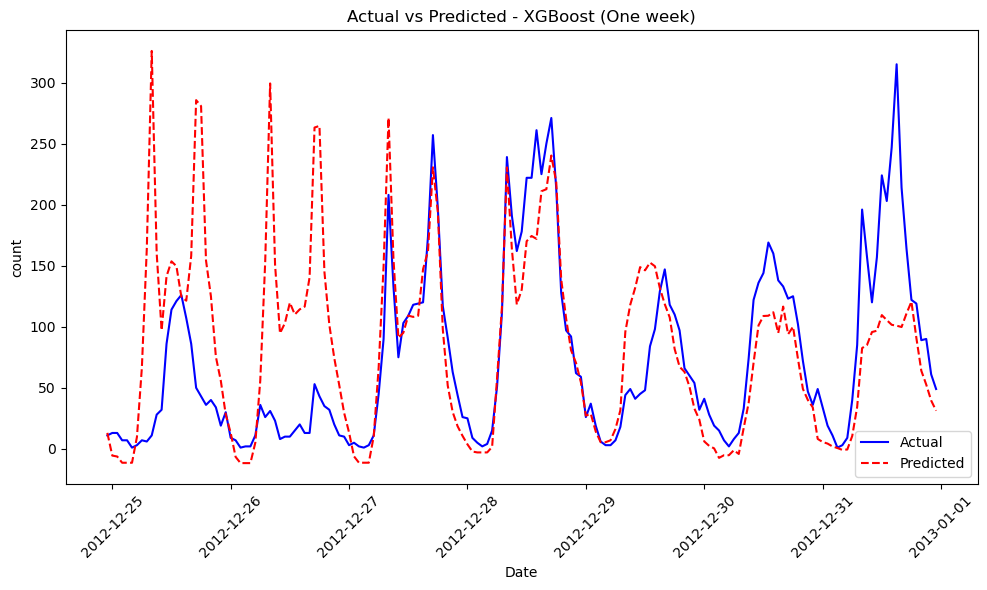

In [860]:

test['prediction'] = reg.predict(dtest)

end_date = y_test_xgb.index[-1]  # End of the test set
start_date = end_date - pd.Timedelta(days=7)  

# Filter for the month for both actual and predicted values
y_test_week = y_test_xgb.loc[start_date:end_date]

# Ensure that 'prediction' column is aligned with the same index as y_test_month
y_pred_xgb_week = test['prediction'].loc[start_date:end_date]

# Plot actual vs predicted for one week
plt.figure(figsize=(10, 6))
plt.plot(y_test_week.index, y_test_week, label='Actual', color='blue')
plt.plot(y_test_week.index, y_pred_xgb_week, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted - XGBoost (One week)')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


We now evaluate the model: We here get a much lower error value for both RMSE and MAE, indicating that the decision tree nature of XGBBoost, in combination with additional independent variables, benefited our model.  

In [861]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")

XGBoost - RMSE: 95.34234222459726
XGBoost - MAE: 59.39648518671154


7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets

Compared to before, we now train on all data, except the data we try to predict. Before we had a 80/20 split.
We start by training and predicting for the next day *24 hours*

In [862]:
train = df.loc[df.index < "2012-12-31"]
test = df.loc[df.index >= "2012-12-31"]

X_train_xgb = train[features_xgb]
y_train_xgb = train[target]

X_test_xgb = test[features_xgb]
y_test_xgb = test[target]

In [863]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'eval_metric': 'rmse',  # Evaluation metric
    'max_depth': 3,  # Depth of the trees
    'learning_rate': 0.01,  # Learning rate
    'colsample_bytree': 0.8,  # Subsample of features
    'subsample': 0.8  # Subsample ratio
}

# Watchlist for monitoring performance on train and test sets
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Number of boosting rounds and early stopping
num_round = 1000  # Number of boosting rounds
early_stopping_rounds = 50  # Early stopping

# Train the model
reg = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=early_stopping_rounds,verbose_eval=100)

# # Predict on the test set
y_pred_xgb = reg.predict(dtest)


[0]	train-rmse:180.18541	eval-rmse:112.90340
[100]	train-rmse:100.87243	eval-rmse:64.03461


c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[189]	train-rmse:79.86652	eval-rmse:64.04329


In [864]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")

XGBoost - RMSE: 64.0644751009449
XGBoost - MAE: 45.950494607289635


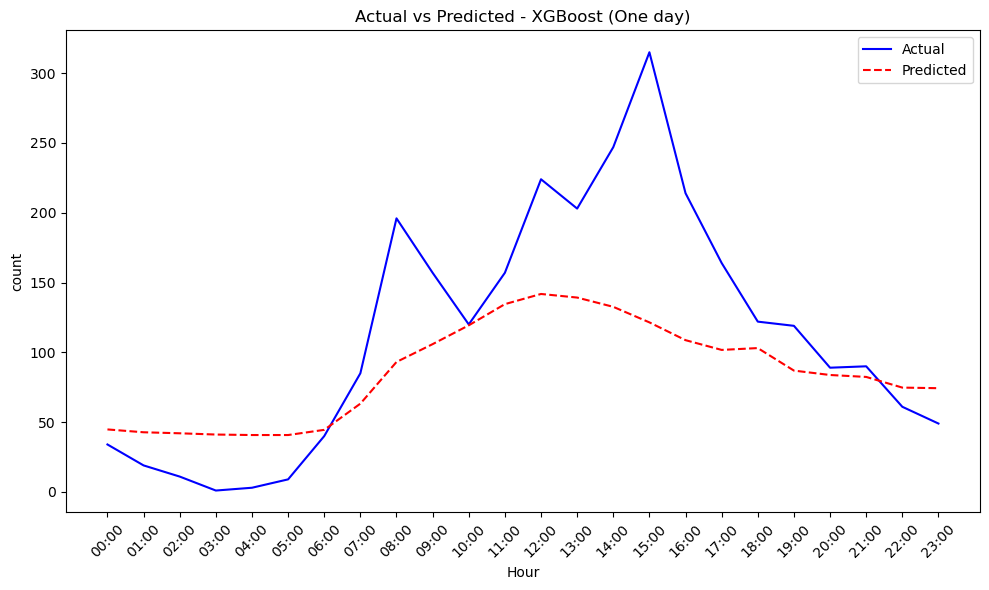

In [865]:
# Plot actual vs predicted for one day
plt.figure(figsize=(10, 6))
plt.plot(y_test_xgb.index, y_test_xgb, label='Actual', color='blue')
plt.plot(y_test_xgb.index, y_pred_xgb, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted - XGBoost (One day)')
plt.xlabel('Hour')
plt.ylabel('count')
plt.legend()
plt.xticks(y_test_xgb.index, y_test_xgb.index.strftime("%H:%M"), rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


We now try with the next month:

In [866]:
train = df.loc[df.index < "2012-12-01"]
test = df.loc[df.index >= "2012-12-01"]

X_train_xgb = train[features_xgb]
y_train_xgb = train[target]

X_test_xgb = test[features_xgb]
y_test_xgb = test[target]

In [867]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'eval_metric': 'rmse',  # Evaluation metric
    'max_depth': 3,  # Depth of the trees
    'learning_rate': 0.01,  # Learning rate
    'colsample_bytree': 0.8,  # Subsample of features
    'subsample': 0.8  # Subsample ratio
}

# Watchlist for monitoring performance on train and test sets
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Number of boosting rounds and early stopping
num_round = 1000  # Number of boosting rounds
early_stopping_rounds = 50  # Early stopping

# Train the model
reg = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=early_stopping_rounds,verbose_eval=100)

# # Predict on the test set
y_pred_xgb = reg.predict(dtest)


[0]	train-rmse:180.74711	eval-rmse:165.14781
[100]	train-rmse:101.10488	eval-rmse:96.23135


c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[200]	train-rmse:79.01233	eval-rmse:77.43644
[300]	train-rmse:73.04821	eval-rmse:71.07265
[400]	train-rmse:70.51855	eval-rmse:67.22932
[500]	train-rmse:68.86786	eval-rmse:65.43464
[600]	train-rmse:67.63084	eval-rmse:64.05549
[700]	train-rmse:66.64613	eval-rmse:62.96661
[800]	train-rmse:65.73424	eval-rmse:62.20035
[900]	train-rmse:64.95077	eval-rmse:61.73907
[999]	train-rmse:64.24306	eval-rmse:61.34885


In [868]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")

XGBoost - RMSE: 61.34884766017768
XGBoost - MAE: 40.1190802198841


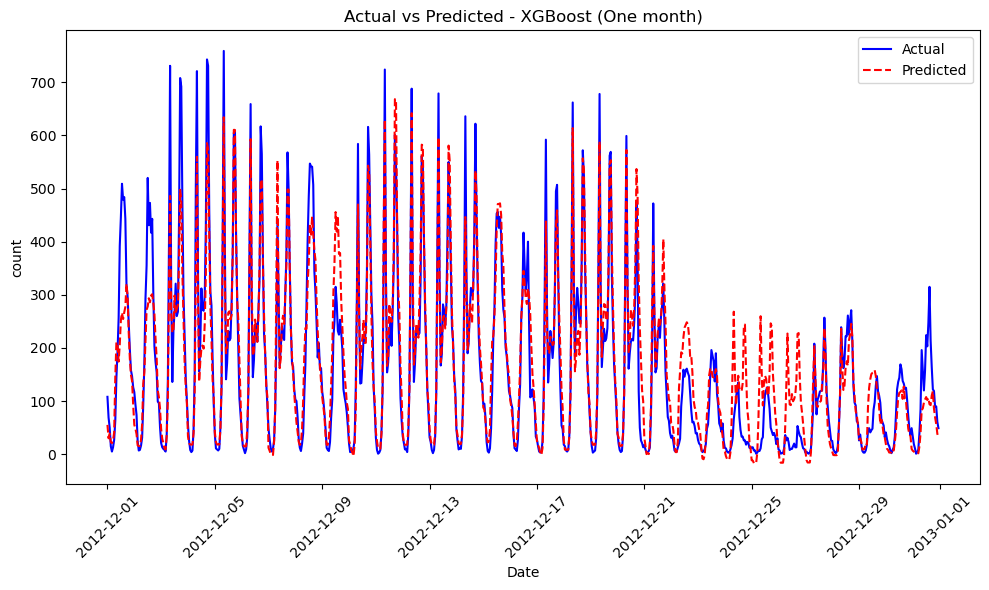

In [869]:
# Plot actual vs predicted for one month
plt.figure(figsize=(10, 6))
plt.plot(y_test_xgb.index, y_test_xgb, label='Actual', color='blue')
plt.plot(y_test_xgb.index, y_pred_xgb, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted - XGBoost (One month)')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.xticks( rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


And for the next week

In [870]:
train = df.loc[df.index < "2012-12-26"]
test = df.loc[df.index >= "2012-12-26"]

X_train_xgb = train[features_xgb]
y_train_xgb = train[target]

X_test_xgb = test[features_xgb]
y_test_xgb = test[target]

In [871]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'eval_metric': 'rmse',  # Evaluation metric
    'max_depth': 3,  # Depth of the trees
    'learning_rate': 0.01,  # Learning rate
    'colsample_bytree': 0.8,  # Subsample of features
    'subsample': 0.8  # Subsample ratio
}

# Watchlist for monitoring performance on train and test sets
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Number of boosting rounds and early stopping
num_round = 1000  # Number of boosting rounds
early_stopping_rounds = 50  # Early stopping

# Train the model
reg = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=early_stopping_rounds,verbose_eval=100)

# # Predict on the test set
y_pred_xgb = reg.predict(dtest)


[0]	train-rmse:180.46340	eval-rmse:131.25103


c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[100]	train-rmse:100.97495	eval-rmse:83.44336
[200]	train-rmse:78.79261	eval-rmse:68.76317
[300]	train-rmse:72.77119	eval-rmse:59.62635
[400]	train-rmse:70.23413	eval-rmse:54.74762
[500]	train-rmse:68.67207	eval-rmse:53.24029
[600]	train-rmse:67.42691	eval-rmse:52.18839
[700]	train-rmse:66.43045	eval-rmse:51.77776
[800]	train-rmse:65.53449	eval-rmse:51.45176
[900]	train-rmse:64.72639	eval-rmse:51.11199
[999]	train-rmse:64.01737	eval-rmse:50.69665


In [872]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")

XGBoost - RMSE: 50.69665318532868
XGBoost - MAE: 36.54111773065395


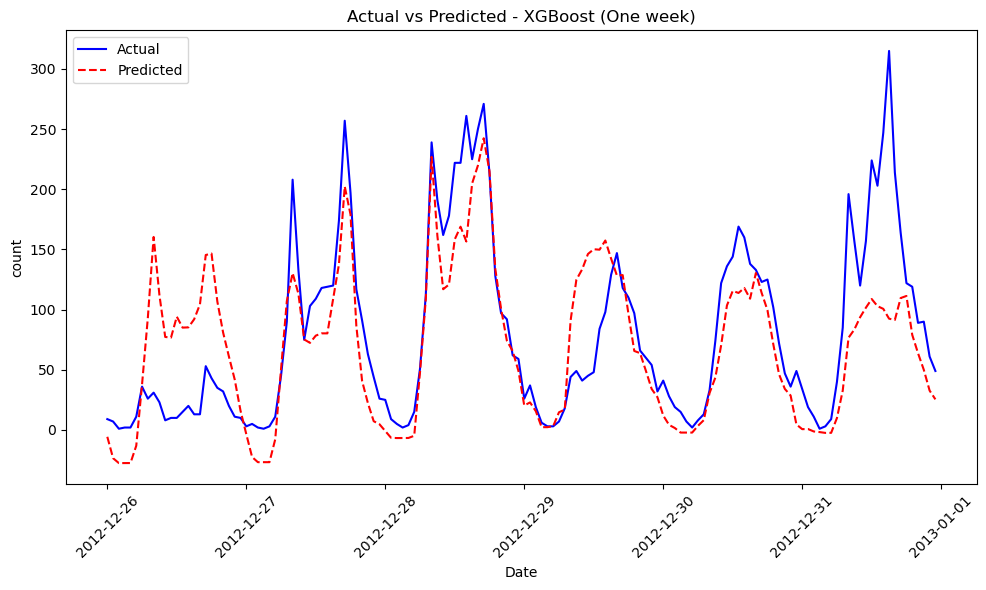

In [873]:
# Plot actual vs predicted for one week
plt.figure(figsize=(10, 6))
plt.plot(y_test_xgb.index, y_test_xgb, label='Actual', color='blue')
plt.plot(y_test_xgb.index, y_pred_xgb, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted - XGBoost (One week)')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.xticks( rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


We get the best results with predicting the next week! The result is also better than when training with a 80/20 split, as seen in task 6

8. Experiment tuning hyperparameters

We now move forward with the dataset consisting of all data, except the last week, trying to tune the hyperparameters 
- #TODO, USE ANOTHER FORM OF CV

##### 

In [883]:
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'eval_metric': ['rmse'],
    'objective': ['reg:squarederror']  # Objective function for regression
}

xgbRe = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgbRe, param_grid=param_grid, cv=3)
grid_search.fit(X_train_xgb, y_train_xgb)

print("Best parameters:", grid_search.best_params_)

best_params = grid_search.best_params_

# Define evaluation watchlist
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Set boosting rounds and early stopping
num_round = 1000  # Maximum boosting rounds
early_stopping_rounds = 50  # Stop if no improvement

# Train model with xgb.train() for early stopping
best_model = xgb.train(best_params, dtrain, num_round, watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=100)

# Predict
y_pred_xgb = best_model.predict(dtest)


Best parameters: {'colsample_bytree': 0.7, 'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 5, 'objective': 'reg:squarederror', 'subsample': 0.5}
[0]	train-rmse:168.40720	eval-rmse:121.67972
[100]	train-rmse:51.63325	eval-rmse:46.19318


c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[192]	train-rmse:43.62677	eval-rmse:46.61746


In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")